Practice implementation for various predictive models

In [1]:
import pandas as pd
import numpy as np
from binance.client import Client
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [24]:
#Read in data
#https://github.com/binance/binance-public-data/

client = Client()

# Set the start date and current date
start_date = "1 Jan, 2020"
end_date = datetime.now().strftime("%d %b, %Y")

# Fetch the klines/candlestick data
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, start_date, end_date)

# Create a DataFrame
df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Convert relevant columns to float
float_columns = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']
df[float_columns] = df[float_columns].astype(float)

Part 1

In [21]:
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010.0,8946.955535,6.459779e+07,0
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667.0,15141.611340,1.070608e+08,0
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854.0,35595.496273,2.577131e+08,0
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370.0,16369.382248,1.200351e+08,0
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209.0,19455.369564,1.446001e+08,0


In [25]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

In [26]:
df = df.drop(['ignore', 'close_time'], axis=1)

In [27]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165,1.212145e+08,194010.0,8946.955535,6.459779e+07
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932,2.259823e+08,302667.0,15141.611340,1.070608e+08
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451,4.950986e+08,519854.0,35595.496273,2.577131e+08
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977,2.198742e+08,279370.0,16369.382248,1.200351e+08
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604,2.848487e+08,329209.0,19455.369564,1.446001e+08


In [29]:
#Returns column
df['returns'] = np.log(df.close.pct_change() + 1)

In [31]:
#Define function for lags using returns
def lagit(df, lags):
    names = []
    for i in range(1, lags+1):
        df['Lag_' + str(i)] = df['returns'].shift(i)
        names.append('Lag_' + str(i))
    return names


In [32]:
lagnames = lagit(df, 5)

In [35]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
timestamp,,,,,,,,,,,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165,1.212145e+08,194010.0,8946.955535,6.459779e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932,2.259823e+08,302667.0,15141.611340,1.070608e+08,-0.033200,NaN,NaN,NaN,NaN,NaN
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451,4.950986e+08,519854.0,35595.496273,2.577131e+08,0.053015,-0.033200,NaN,NaN,NaN,NaN
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977,2.198742e+08,279370.0,16369.382248,1.200351e+08,0.001245,0.053015,-0.033200,NaN,NaN,NaN
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604,2.848487e+08,329209.0,19455.369564,1.446001e+08,0.000631,0.001245,0.053015,-0.0332,NaN,NaN


In [36]:
df.dropna(inplace=True)

In [41]:
lr = LinearRegression()

In [42]:
X = df[lagnames]
y = df['returns']
lr.fit(X, y)

LinearRegression()

In [50]:
df['prediction_LR'] = lr.predict(df[lagnames])
df['direction_LR'] = [1 if i>0 else -1 for i in df.prediction_LR]
df['strat_LR'] = df['direction_LR'] * df['returns']

np.exp(df[['returns', 'strat_LR']].sum())

returns      7.416473
strat_LR    31.921404
dtype: float64

<Axes: xlabel='timestamp'>

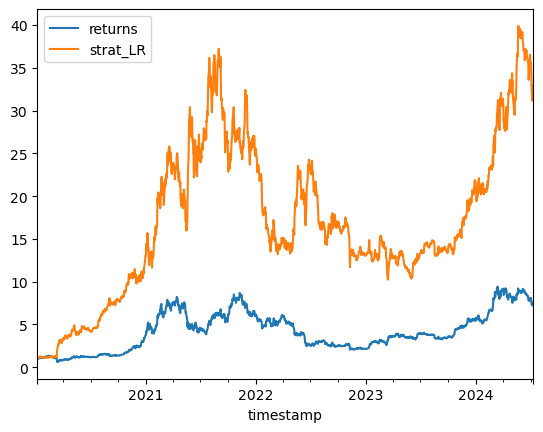

In [49]:
np.exp(df[['returns', 'strat_LR']].cumsum()).plot()

Part 2

In [51]:
#Train test split
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [52]:
train = train.copy()
test = test.copy()

In [53]:
lr = LinearRegression()

In [56]:
lr.fit(train[lagnames], train['returns'])

LinearRegression()

In [64]:
test['predictions_LR'] = lr.predict(test[lagnames]) #Make predictions using model on lags
test['direction_LR'] = [1 if i>0 else -1 for i in test.prediction_LR] #1 or -1 based on sign of predictions
test['strat_LR'] = test['direction_LR'] * test['returns'] #Return for given prediction

np.exp(test[['returns', 'strat_LR']].sum())

returns     1.970445
strat_LR    2.177868
dtype: float64

<Axes: xlabel='timestamp'>

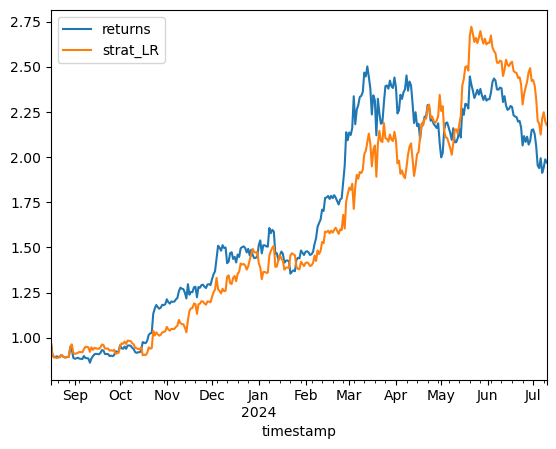

In [62]:
np.exp(test[['returns', 'strat_LR']].cumsum()).plot()

In [65]:
(test['direction_LR'].diff() != 0).value_counts()

direction_LR
True     167
False    163
Name: count, dtype: int64

InvalidIndexError: (['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5'], 'prediction_LR')